In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

1. Классификация образов методом k-ближайших соседей.

In [2]:
data_x = [(4.9, 3.3), (5.6, 4.5), (6.4, 4.3), (6.7, 5.7), (6.3, 5.0), (5.2, 3.9), (5.5, 3.7), (5.6, 3.6), (5.5, 3.8), (6.1, 4.7), (7.4, 6.1), (6.0, 5.1), (5.5, 4.4), (5.9, 5.1), (6.5, 5.8), (6.5, 4.6), (6.7, 4.4), (6.3, 5.6), (5.9, 4.8), (6.0, 4.5), (5.6, 4.1), (5.6, 4.9), (4.9, 4.5), (6.2, 4.5), (6.1, 4.7), (6.1, 4.9), (6.2, 5.4), (5.7, 4.2), (6.1, 5.6), (5.8, 4.0), (6.6, 4.6), (5.6, 4.2), (7.2, 6.1), (7.7, 6.7), (5.6, 3.9), (7.7, 6.9), (6.0, 4.0), (6.1, 4.0), (7.6, 6.6), (5.1, 3.0), (6.3, 6.0), (6.7, 5.7), (6.8, 5.9), (6.4, 5.5), (7.0, 4.7), (5.8, 5.1), (5.8, 5.1), (6.4, 5.3), (6.3, 4.9), (6.4, 5.3), (5.7, 3.5), (7.2, 5.8), (6.4, 5.6), (5.7, 4.5), (6.0, 4.5), (7.7, 6.1), (6.2, 4.3), (7.1, 5.9), (7.3, 6.3), (5.0, 3.3), (6.3, 5.1), (5.8, 3.9), (6.4, 4.5), (6.3, 5.6), (6.8, 5.5), (6.9, 5.4), (5.5, 4.0), (5.7, 4.1), (6.5, 5.5), (6.3, 4.7), (5.0, 3.5), (6.7, 5.8), (6.9, 4.9), (7.7, 6.7), (5.8, 4.1), (6.4, 5.6), (6.7, 5.2), (6.7, 4.7), (5.4, 4.5), (6.8, 4.8), (5.7, 4.2), (5.5, 4.0), (6.3, 4.9), (6.5, 5.2), (5.8, 5.1), (6.0, 4.8), (6.2, 4.8), (6.5, 5.1), (7.9, 6.4), (6.7, 5.0), (6.7, 5.6), (6.0, 5.0), (6.1, 4.6), (5.7, 5.0), (7.2, 6.0), (6.3, 4.4), (5.9, 4.2), (6.9, 5.1), (6.6, 4.4), (6.9, 5.7)]
data_y = [-1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, -1, 1]

data_x = np.array(data_x)
data_y = np.array(data_y)

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

k = 5

distance = lambda x0, x: np.sum(np.abs(x0 - x), axis=1)

ro = np.array([distance(x0, x_train) for x0 in x_test])
ro_sorted = np.array([x.argpartition(range(5))[:5] for x in ro])
y_ro = y_train[ro_sorted]
predict = np.sign(np.sum(y_ro, axis=1))

Q = sum(predict != y_test)

Используем метрику Минковского:
### $\rho = (\sum w * \vert{xk - xm}\vert ^p)^{1/p})$

Расчитываем расстояние между образами, сортируем его по возрастанию и отбираем первые 5 ближайших соседей.

С помощью знаковой функции делаем предсказание.

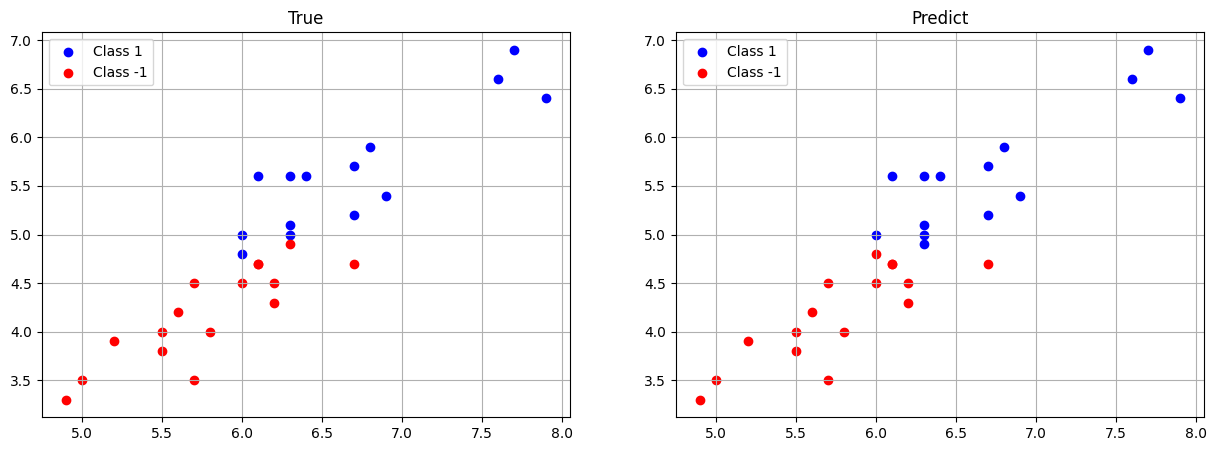

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_test[y_test == 1]
x_1 = x_test[y_test == -1]

ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 1')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class -1')
ax[0].set_title('True')
ax[0].legend()

x_0_pr = x_test[predict == 1]
x_1_pr = x_test[predict == -1]

ax[1].scatter(x_0_pr[:, 0], x_0_pr[:, 1], color='blue', label='Class 1')
ax[1].scatter(x_1_pr[:, 0], x_1_pr[:, 1], color='red', label='Class -1')
ax[1].set_title('Predict')
ax[1].legend()

plt.show()

2. Классификация образов методом k-ближайших соседей.

In [11]:
np.random.seed(0)
n_feature = 5 # количество признаков

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 7, -2, 4, 6]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [3, 7, -2, 4, 6] + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 100, 120, 90
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.3, shuffle=True)

model = lambda x: np.sum((x - x_train)**2, axis=1)

a = np.array([y_train[np.argsort(model(x))][:5] for x in x_test])
b = [dict(zip(u, v)) for u, v in [np.unique(x, return_counts=True) for x in a]]

predict = np.array([max(i, key=i.get) for i in b])

Q = (predict != y_test).mean()

Евклидова метрика:
### $\rho = \sum (x_{k} - x_{m})^2$

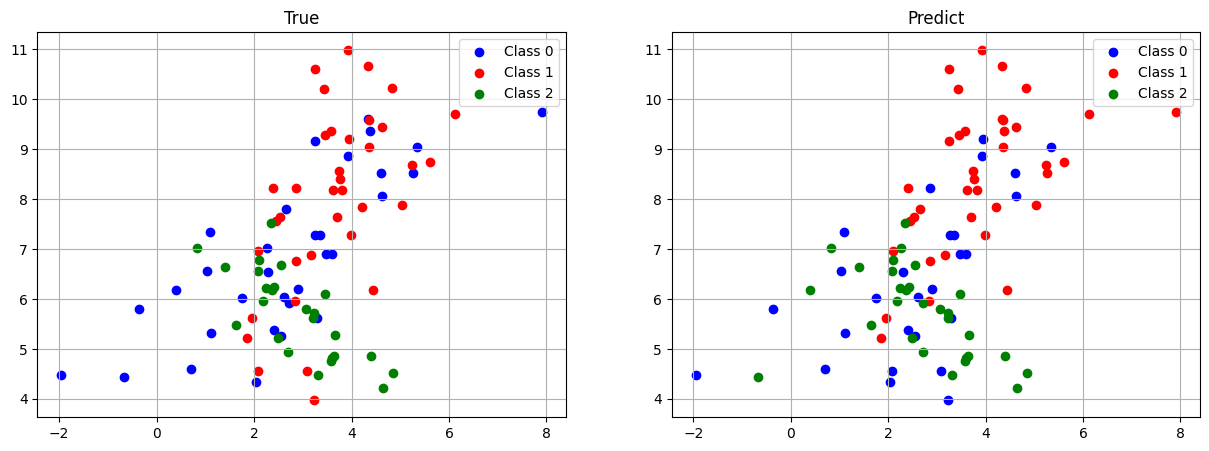

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_test[y_test == 0]
x_1 = x_test[y_test == 1]
x_2 = x_test[y_test == 2]


ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 0')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class 1')
ax[0].scatter(x_2[:, 0], x_2[:, 1], color='green', label='Class 2')

ax[0].set_title('True')
ax[0].legend()

x_0_pr = x_test[predict == 0]
x_1_pr = x_test[predict == 1]
x_2_pr = x_test[predict == 2]


ax[1].scatter(x_0_pr[:, 0], x_0_pr[:, 1], color='blue', label='Class 0')
ax[1].scatter(x_1_pr[:, 0], x_1_pr[:, 1], color='red', label='Class 1')
ax[1].scatter(x_2_pr[:, 0], x_2_pr[:, 1], color='green', label='Class 2')

ax[1].set_title('Predict')
ax[1].legend()

plt.show()

3. Классификация образов с помощью метода Парзеновских окон.

In [17]:
np.random.seed(0)
n_feature = 2 # число признаков

# исходные параметры для формирования образов обучающей выборки
r1 = 0.7
D1 = 3.0
mean1 = [3, 3]
V1 = [[D1 * r1 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r2 = 0.5
D2 = 2.0
mean2 = [1, 1] # + np.array(range(1, n_feature+1)) * 0.5
V2 = [[D2 * r2 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

r3 = -0.7
D3 = 1.0
mean3 = [-2, -2]  # + np.array(range(1, n_feature+1)) * -0.5
V3 = [[D3 * r3 ** abs(i-j) for j in range(n_feature)] for i in range(n_feature)]

# моделирование обучающей выборки
N1, N2, N3 = 200, 150, 190
x1 = np.random.multivariate_normal(mean1, V1, N1).T
x2 = np.random.multivariate_normal(mean2, V2, N2).T
x3 = np.random.multivariate_normal(mean3, V3, N3).T

data_x = np.hstack([x1, x2, x3]).T
data_y = np.hstack([np.zeros(N1), np.ones(N2), np.ones(N3) * 2])

h = 1

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=123,test_size=0.5, shuffle=True)

ro = lambda x: np.sum(np.abs(x_train - x), axis=1)

K = lambda r: ((1/np.sqrt(2*np.pi)) * np.exp(-r**2/2))/h

yi = [0, 1, 2]

k = np.array([K(r) for r in [ro(x) for x in x_test]])

a = np.array([np.sum((y_train == y) * k, axis=1) for y in yi])
          
predict = np.argmax(a, axis=0)

Q = (predict != y_test).mean()

Алгоритм классификации с использованием парзеновского окна:
### $a = argmax \sum [y_{i} = y] * K(\frac{\rho}{h})$

Метрика:
### $\rho = \sum \vert{x - x_{k}}\vert$

В качестве функции ядра, выберем гауссовской ядро:
### $K(r) = \frac{1}{\sqrt{2\pi}} * exp(-\frac{r^2}{2})$

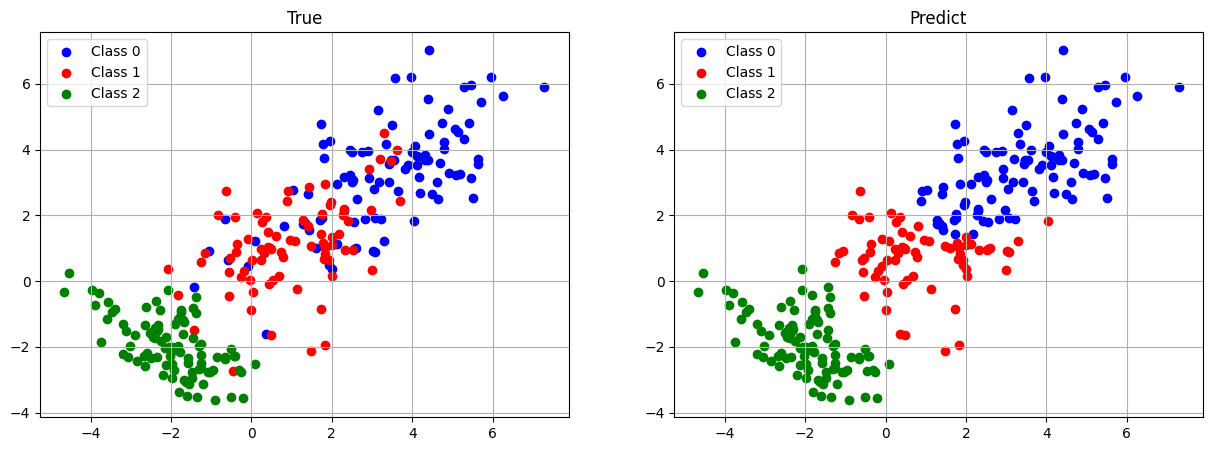

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].grid()
ax[1].grid()

x_0 = x_test[y_test == 0]
x_1 = x_test[y_test == 1]
x_2 = x_test[y_test == 2]


ax[0].scatter(x_0[:, 0], x_0[:, 1], color='blue', label='Class 0')
ax[0].scatter(x_1[:, 0], x_1[:, 1], color='red', label='Class 1')
ax[0].scatter(x_2[:, 0], x_2[:, 1], color='green', label='Class 2')

ax[0].set_title('True')
ax[0].legend()

x_0_pr = x_test[predict == 0]
x_1_pr = x_test[predict == 1]
x_2_pr = x_test[predict == 2]


ax[1].scatter(x_0_pr[:, 0], x_0_pr[:, 1], color='blue', label='Class 0')
ax[1].scatter(x_1_pr[:, 0], x_1_pr[:, 1], color='red', label='Class 1')
ax[1].scatter(x_2_pr[:, 0], x_2_pr[:, 1], color='green', label='Class 2')

ax[1].set_title('Predict')
ax[1].legend()

plt.show()